In [1]:
from collections import OrderedDict
from glob import glob
import numpy as np
import pandas as pd
from os.path import join
import re
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import xarray as xr

import torch
import torch.nn as nn
from torch import Tensor
from torchmetrics.utilities.checks import _check_same_shape
from torchmetrics import Metric
import pytorch_lightning as pl
from torch.optim.lr_scheduler import ExponentialLR, ReduceLROnPlateau
from torch.utils.data import DataLoader, TensorDataset
import pylab as plt
import matplotlib

/Users/andy/Library/Python/3.9/lib/python/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: dlopen(/Users/andy/Library/Python/3.9/lib/python/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: /Users/andy/Library/Python/3.9/lib/python/site-packages/torchvision/image.so
  Reason: tried: '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/Users/malfet/miniforge3/envs/py_39_torch-1.10.2/lib/libpng16.16.dylib' (no such file), '/usr/local/lib/libpng16.16.dylib' (no such file), '/usr/lib/libpng16.16.dylib' (no such file)
  warn(f"Failed to load image Python extension: {e}")


In [2]:
import sys
sys.path.insert(0, "../pismemulator/")

from nnemulator import PISMDataset

In [4]:
dataset = PISMDataset(data_dir="../data/speeds_v2/",
                      samples_file="../data/samples/velocity_calibration_samples_100.csv",
                      target_file="../data/observed_speeds/greenland_obs_g1800m.nc",
                     target_corr_threshold=25)
            

The following simulations are missing:
   [337, 595, 20, 539, 542]
  ... adjusting priors
  Loading data sets...


995it [00:42, 23.67it/s]
/Users/andy/base/pism-emulator/tests/../pismemulator/nnemulator.py:479: RuntimeWarning: divide by zero encountered in log10
  response = np.log10(response)


In [ ]:
cd ../speedemulator/

In [ ]:
run ../speedemulator/sample_posterior.py --emulator_dir ../speedemulator/2021_11_gris_2km_cpu --data_dir ../data/speeds_v2/ --target_file ../data/observed_speeds/greenland_obs_g1800m.nc

In [ ]:
data_dir="../data/speeds_v2/"
samples_file="../data/samples/velocity_calibration_samples_100.csv"
target_file="../data/observed_speeds/greenland_obs_g1800m.nc"
target_var="velsurf_mag"
target_corr_threshold=25.0
target_corr_var="thickness"
target_error_var="velsurf_mag_error"
training_var="velsurf_mag"
thinning_factor=1
normalize_x=True
log_y=True
threshold=100e3
epsilon=0
return_numpy=False


In [ ]:
A = torch.randn(2, 2, dtype=torch.complex128)

In [ ]:
A

In [ ]:
B = torch.randn(2, 2, dtype=torch.float)

In [ ]:
B

In [ ]:
U, V = torch.linalg.eig(B)

In [ ]:
import torch
import torch.nn as nn
from torch import Tensor
from torchmetrics.utilities.checks import _check_same_shape
from torchmetrics import Metric
import pytorch_lightning as pl
from collections import OrderedDict


In [ ]:
n_hidden = [128, 256, 256, 128]
n_layers = 5
n = 0

models = []
for  n in range(n_layers - 2):
    models.append(nn.Sequential(
        OrderedDict(
            [
                ("Linear", nn.Linear(n_hidden[n], n_hidden[n+1])),
                ("LayerNorm", nn.LayerNorm(n_hidden)),
                ("Dropout", nn.Dropout(p=0.1)),
            ]
        ))
                 )

In [ ]:
nn.ModuleList(models)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import pymc3 as pm

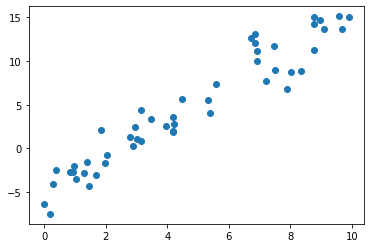

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + 2*rng.randn(50)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x, y)


In [4]:
basic_model =  pm.Model()

In [5]:
with basic_model as bm:

    #Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Deterministics
    mu = alpha + beta*x
    
    # Likelihood 
    Ylikelihood = pm.Normal('Ylikelihood', mu=mu, sd=sigma, observed=y)

In [6]:
trace = pm.sample(draws=2000,model=bm)

/var/folders/5g/4lg4tzwn1_d4x1q5t32_wrl80000gn/T/ipykernel_17318/1657056807.py:1: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(draws=2000,model=bm)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.


/var/folders/5g/4lg4tzwn1_d4x1q5t32_wrl80000gn/T/ipykernel_17318/4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

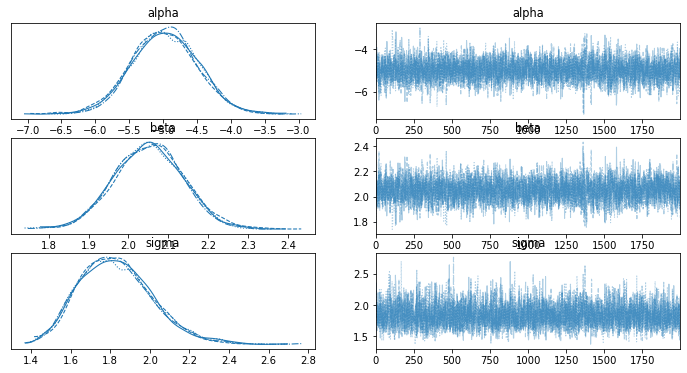

In [7]:
pm.traceplot(trace)

In [8]:
print(pm.summary(trace).round(2))

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha -4.97  0.48   -5.90    -4.11       0.01     0.01    3449.0    3183.0   
beta   2.05  0.09    1.90     2.22       0.00     0.00    3187.0    4070.0   
sigma  1.83  0.18    1.52     2.20       0.00     0.00    3955.0    3692.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0  


In [9]:
model =  pm.Model()
with model as m:

    #Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    xn = pm.Normal('x', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Deterministics
    mu = alpha + beta*xn
    
    # Likelihood 
    Ylikelihood = pm.Normal('Ylikelihood', mu=mu, sd=sigma, observed=y)

In [15]:
intercept = 0 
gradient = 2.5
size = 10000

x_true = np.array(np.linspace(0,1,size))
y_true = intercept + gradient * x_true

# adding noise to data
x = x_true + np.random.normal(loc=0, scale=0.5, size=size)
y = y_true + np.random.normal(loc=0, scale=0.5, size=size)

/var/folders/5g/4lg4tzwn1_d4x1q5t32_wrl80000gn/T/ipykernel_17318/25887176.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(800, tune=1500, chains=4, cores=8, init='jitter+adapt_diag')
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 8 jobs)
NUTS: [slope, offset, x_mu, err_param, err_odr]


Sampling 4 chains for 1_500 tune and 800 draw iterations (6_000 + 3_200 draws total) took 83 seconds.
The acceptance probability does not match the target. It is 0.698683344136335, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6166535816236556, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.47848011982280325, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/5g/4lg4tzwn1_d4x1q5t32_wrl80000gn/T/ipykernel_17318/25887176.py:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.trac

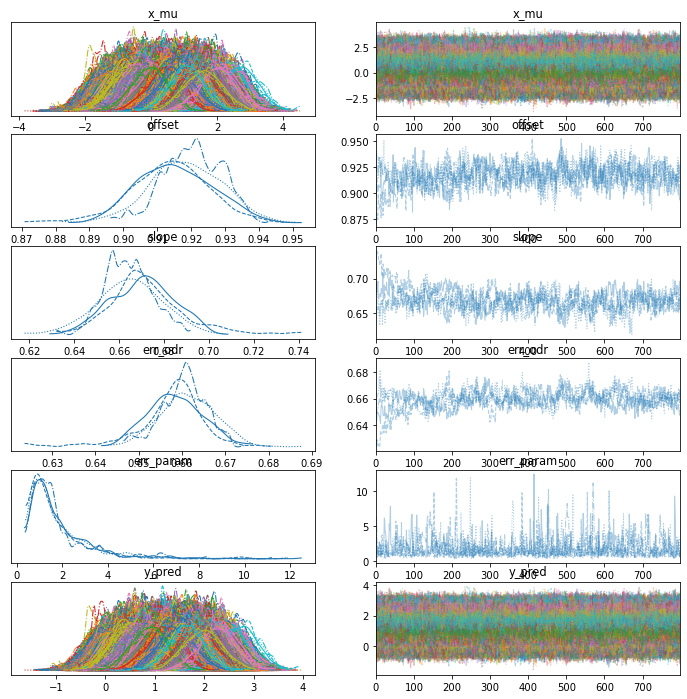

In [16]:
with pm.Model() as model:
    err_odr = pm.HalfNormal('err_odr', 5.)
    err_param = pm.HalfNormal('err_param', 5.)
    x_lat = pm.Normal('x_mu', 0, 5., shape=x.shape[0])
    x_obs = pm.Normal('x_obs', mu=x_lat, sd=err_odr, observed=x, shape=x.shape[0])
    offset = pm.Normal('offset', 0, err_param)
    slope = pm.Normal('slope', 0, err_param)
    y_pred = pm.Deterministic('y_pred', offset + slope * x_lat)
    y_obs = pm.Normal('y', mu=y_pred, sd=err_odr, observed=y)
    
    trace = pm.sample(800, tune=1500, chains=4, cores=8, init='jitter+adapt_diag')
    pm.traceplot(trace)

/var/folders/5g/4lg4tzwn1_d4x1q5t32_wrl80000gn/T/ipykernel_17318/4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.

KeyboardInterrupt



Error in callback <function flush_figures at 0x10d3f1700> (for post_execute):


KeyboardInterrupt: 

In [5]:
clear